## Smart healtcare framework for machine learning & intertpretable prediction of ssi

In [1]:
# pip install pandas pandasgui matplotlib seaborn sci-kit-learn # Make sure you run this cell before the rest, and restart kernel 

In [2]:
# Import neccessary tools for dataset normalization

import pandas as pd
from pandasgui import show
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1 = pd.read_csv("S-Full.CSV") # Load dataset from csv file

C:\Users\MADTech\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (23,24,31,38,75,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df1['SSI_EVENT'].value_counts()

no     156936
yes      1787
Name: SSI_EVENT, dtype: int64

## Normalizing the data type of the columns and droping irrelevant columns

In [4]:
df1.iloc[:, 23] = df1.iloc[:, 23].str.replace('[\,]', '', regex=True)
df1.iloc[:, 23] = pd.to_numeric(df1.iloc[:, 23])
# Column 23 (HIEGHT) normalized to float

In [5]:
df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].str.replace('[\,/,]', '', regex=True)
# Column PRE_PROCEDURE_DIAGNOSIS normalized

In [6]:
df1.iloc[:, 24] = df1.iloc[:, 24].str.replace('[\,]', '', regex=True)
df1.iloc[:, 24] = pd.to_numeric(df1.iloc[:, 24])
# Column 24 (WEIGHT) normalized to float

In [7]:
df1.iloc[:, 31] = df1.iloc[:, 31].str.replace('[\,]', '', regex=True)
df1.iloc[:, 31] = pd.to_numeric(df1.iloc[:, 31])
# Column 31 (CORE_TEMPERATURE) normalized to float

In [8]:
# After noticing some of the columns have almost all it value to be NAN
# We have decided to drop all of such columns because it is assumed that we do not have data for such columns

df1.isnull().sum() / df1.shape[0] # Returns the percentage of NAN is each column

n = df1.shape[0] // 2 # Taking half of the amount of the entire dataset

# For a column to remain in the dataset, it is advicable that more than half of it values most not be empty

df1.dropna(axis=1, thresh=n, inplace=True)  # Droping columns with over half of it values as NAN

In [9]:
df1.isnull().sum() / df1.shape[0]

REGIONS_NAME                                      0.000000
RS_NAME                                           0.000000
PROCEDURE_NAME                                    0.000000
TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')     0.000000
TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')       0.000000
TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')    0.000000
ENCOUNTER_ID                                      0.000000
SUBJECT_ID                                        0.000000
ORGANIZATIONAL_UNIT_ID                            0.000000
SDL_ID                                            0.000000
FORM_INSTANCE_ID                                  0.000000
LANGUAGE_SHORT_DESC                               0.000000
CREATED_BY                                        0.000000
CREATED_ON                                        0.000000
LOCATION                                          0.000000
PROCEDURE_DATE                                    0.000000
PROCEDURE_NAME_1                                  0.0000

In [10]:
# show(df1)

In [11]:
# Droping irrelevant columns

df1.drop([
    'REGIONS_NAME', 'RS_NAME', 'PROCEDURE_NAME_1', 'LANGUAGE_SHORT_DESC', 'ORGANIZATIONAL_UNIT_ID',
    'FORM_INSTANCE_ID', 'ENCOUNTER_ID', 'SUBJECT_ID', 'SDL_ID', 'CREATED_BY', 'SURGEON_ID',
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')", "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')",
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')", 'PROCEDURE_DATE', 'CREATED_ON', 'HOSPITAL_ADMISSION_DATE', 
], axis=1, inplace=True)

In [12]:
df1.dtypes

PROCEDURE_NAME                   object
LOCATION                         object
SURVEILLANCE_PERIOD              object
EMERGENCY                        object
PRE_PROCEDURE_DIAGNOSIS          object
HEIGHT                          float64
WEIGHT                          float64
OVERALL_COMPLIANCE               object
HAIR_CLIPPED                     object
ANTIBIOTIC_BEFORE_SURGICAL       object
PROPHYLACTIC_ANTIBIOTIC          object
DISCONTINUATION_PROPHYLACTIC     object
TEMPERATURE_NORMAL               object
MULTIPLE_PROCEDURES              object
LAPAROSCOPE_ENDOSCOPE            object
TRAUMA                           object
WOUND_CLASS                      object
GENERAL_ANESTHESIA               object
ASA_SCORE                         int64
PROCEDURE_DURATION                int64
SSI_EVENT                        object
dtype: object

In [13]:
# show(df1[df1['SSI_EVENT'] == 'yes'])
# show(df1[df1['SSI_EVENT'] == 'no'])

## Handling missing values

In [14]:
df1.isnull().sum()

PROCEDURE_NAME                      0
LOCATION                            0
SURVEILLANCE_PERIOD             22205
EMERGENCY                           0
PRE_PROCEDURE_DIAGNOSIS             4
HEIGHT                          19459
WEIGHT                          76803
OVERALL_COMPLIANCE                  0
HAIR_CLIPPED                    28330
ANTIBIOTIC_BEFORE_SURGICAL       7869
PROPHYLACTIC_ANTIBIOTIC          9615
DISCONTINUATION_PROPHYLACTIC     9120
TEMPERATURE_NORMAL               3310
MULTIPLE_PROCEDURES                 0
LAPAROSCOPE_ENDOSCOPE               0
TRAUMA                              0
WOUND_CLASS                         0
GENERAL_ANESTHESIA                  0
ASA_SCORE                           0
PROCEDURE_DURATION                  0
SSI_EVENT                           0
dtype: int64

In [15]:
# Handling missing values for SURVEILLANCE_PERIOD column

sp_mod = df1['SURVEILLANCE_PERIOD'].mode()[0]  # Taking the mode of the column

df1['SURVEILLANCE_PERIOD'] = df1['SURVEILLANCE_PERIOD'].fillna(value=sp_mod)  # Filling the missing values with the mode

df1['SURVEILLANCE_PERIOD'].isnull().sum()

# df1.loc[df2['SURVEILLANCE_PERIOD'] == df1['SURVEILLANCE_PERIOD'].mode()[0], ['SURVEILLANCE_PERIOD', 'SSI_EVENT']]


0

In [16]:
# Handling missing values for PRE_PROCEDURE_DIAGNOSIS column

ppd_mod = df1['PRE_PROCEDURE_DIAGNOSIS'].mode()[0]

df1.loc[df1['PRE_PROCEDURE_DIAGNOSIS'] == ppd_mod, ['PRE_PROCEDURE_DIAGNOSIS', 'SSI_EVENT']]

df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].fillna(value=ppd_mod)

df1['PRE_PROCEDURE_DIAGNOSIS'].isnull().sum()

0

In [17]:
# Handling missing values for HEIGHT column

h_mn = df1['HEIGHT'].mean()  # Taking the mean of the column and round it to 1 decimal place

h_md = df1['HEIGHT'].median()  # Taking the median of the column

# df2['HEIGHT'].mode()[0] # here, the mode is complicated so it is better left out

df1['HEIGHT'] = df1['HEIGHT'].apply(lambda x: np.random.choice([h_mn, h_md]) if np.isnan(x) or x == 0 else x)
# Filled the missing values for the height column with random values between the mean and median

df1['HEIGHT'] = round(df1['HEIGHT'], 0)

df1['HEIGHT'].isnull().sum()  # Confirming the result

0

In [18]:
# Handling missing values for WEIGHT column

w_mn = df1['WEIGHT'].mean()

w_md = df1['WEIGHT'].median()

w_mod = df1['WEIGHT'].mode()[0]

df1['WEIGHT'] = df1['WEIGHT'].apply(lambda x: np.random.choice([w_mn, w_md, w_mod]) if np.isnan(x) or x == 0 else x)

df1['WEIGHT'] = round(df1['WEIGHT'], 0)

df1['WEIGHT'].isnull().sum()

0

In [19]:
# Handling missing values for HAIR_CLIPPED column

hc_mod = df1['HAIR_CLIPPED'].mode()[0]

df1.loc[df1['HAIR_CLIPPED'] == hc_mod, ['HAIR_CLIPPED', 'SSI_EVENT']]

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].fillna(value=hc_mod)

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].apply(lambda x: x if x != 'ND' else hc_mod)

df1['HAIR_CLIPPED'].isnull().sum()

0

In [20]:
# Handling missing values for ANTIBIOTIC_BEFORE_SURGICAL column

abs_mod = df1['ANTIBIOTIC_BEFORE_SURGICAL'].mode()[0]

df1.loc[df1['ANTIBIOTIC_BEFORE_SURGICAL'] == abs_mod, ['ANTIBIOTIC_BEFORE_SURGICAL', 'SSI_EVENT']]

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].fillna(value=abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].apply(lambda x: x if x != 'ND' else abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'].isnull().sum()

0

In [21]:
# Handling missing values for PROPHYLACTIC_ANTIBIOTIC column

pa_mod = df1['PROPHYLACTIC_ANTIBIOTIC'].mode()[0]

df1.loc[df1['PROPHYLACTIC_ANTIBIOTIC'] == pa_mod, ['PROPHYLACTIC_ANTIBIOTIC', 'SSI_EVENT']]

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].fillna(value=pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].apply(lambda x: x if x != 'ND' else pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'].isnull().sum()

0

In [22]:
# Handling missing values for DISCONTINUATION_PROPHYLACTIC column

dp_mod = df1['DISCONTINUATION_PROPHYLACTIC'].mode()[0]

df1.loc[df1['DISCONTINUATION_PROPHYLACTIC'] == dp_mod, ['DISCONTINUATION_PROPHYLACTIC', 'SSI_EVENT']]

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].fillna(value=dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].apply(lambda x: x if x != 'ND' else dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'].isnull().sum()

0

In [23]:
# Handling missing values for TEMPERATURE_NORMAL column

tn_mod = df1['TEMPERATURE_NORMAL'].mode()[0]

df1.loc[df1['TEMPERATURE_NORMAL'] == tn_mod, ['TEMPERATURE_NORMAL', 'SSI_EVENT']]

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].fillna(value=tn_mod)

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].apply(lambda x: x if x != 'ND' else tn_mod)

df1['TEMPERATURE_NORMAL'].isnull().sum()

0

In [24]:
mp_mod = df1['MULTIPLE_PROCEDURES'].mode()[0]

df1['MULTIPLE_PROCEDURES'] = df1['MULTIPLE_PROCEDURES'].apply(lambda x: x if x != 'unknown' else mp_mod)

In [25]:
df1.isnull().sum()

PROCEDURE_NAME                  0
LOCATION                        0
SURVEILLANCE_PERIOD             0
EMERGENCY                       0
PRE_PROCEDURE_DIAGNOSIS         0
HEIGHT                          0
WEIGHT                          0
OVERALL_COMPLIANCE              0
HAIR_CLIPPED                    0
ANTIBIOTIC_BEFORE_SURGICAL      0
PROPHYLACTIC_ANTIBIOTIC         0
DISCONTINUATION_PROPHYLACTIC    0
TEMPERATURE_NORMAL              0
MULTIPLE_PROCEDURES             0
LAPAROSCOPE_ENDOSCOPE           0
TRAUMA                          0
WOUND_CLASS                     0
GENERAL_ANESTHESIA              0
ASA_SCORE                       0
PROCEDURE_DURATION              0
SSI_EVENT                       0
dtype: int64

In [26]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}")

PROCEDURE_NAME - 39
LOCATION - 2
SURVEILLANCE_PERIOD - 2
EMERGENCY - 2
PRE_PROCEDURE_DIAGNOSIS - 83109
HEIGHT - 238
WEIGHT - 294
OVERALL_COMPLIANCE - 2
HAIR_CLIPPED - 2
ANTIBIOTIC_BEFORE_SURGICAL - 2
PROPHYLACTIC_ANTIBIOTIC - 2
DISCONTINUATION_PROPHYLACTIC - 2
TEMPERATURE_NORMAL - 2
MULTIPLE_PROCEDURES - 2
LAPAROSCOPE_ENDOSCOPE - 2
TRAUMA - 2
WOUND_CLASS - 4
GENERAL_ANESTHESIA - 2
ASA_SCORE - 5
PROCEDURE_DURATION - 541
SSI_EVENT - 2


In [27]:
# show(df1)

## ANOMALY DETECTION AND HANDLING

In [28]:
# IQR Function to detect outlier

def anom_det(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bottom = np.percentile(data, 25) - 1.5 * iqr
    top = np.percentile(data, 75) + 1.5 * iqr
    return bottom, top

In [29]:
# Handling anomaly(outlier) for HEIGHT

h_bottom, h_top = anom_det(df1['HEIGHT'])

# df1.drop(df1.loc[((df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top), ['HEIGHT']] = df1['HEIGHT'].median()
df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
0,APPY,yes,thirty,Yes,Acut appendix,64.0,151.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
1,APPY,no,thirty,Yes,ACUT APPENDIX,74.0,165.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,60,no
2,APPY,no,ninty,Yes,ACUT APPENDICITIS,52.0,160.0,No,Yes,Yes,Yes,No,Yes,No,No,No,3_Contaminated,Yes,1,60,no
3,APPY,no,thirty,Yes,acute appendicitis,89.0,169.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,105,no
4,APPY,no,thirty,Yes,acute appendicitis,36.0,146.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,158.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158719,CSEC,no,ninty,No,prev cs,153.0,78.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158720,CSEC,no,ninty,No,previous cs,158.0,99.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no


In [30]:
# Handling anomaly (outlier) for WEIGHT

w_bottom, w_top = anom_det(df1['WEIGHT'])

# df1.drop(df1.loc[((df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top), ['WEIGHT']] = df1['WEIGHT'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
0,APPY,yes,thirty,Yes,Acut appendix,64.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
1,APPY,no,thirty,Yes,ACUT APPENDIX,74.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,60,no
2,APPY,no,ninty,Yes,ACUT APPENDICITIS,52.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,3_Contaminated,Yes,1,60,no
3,APPY,no,thirty,Yes,acute appendicitis,89.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,105,no
4,APPY,no,thirty,Yes,acute appendicitis,36.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,158.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158719,CSEC,no,ninty,No,prev cs,153.0,78.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158720,CSEC,no,ninty,No,previous cs,158.0,99.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no


In [31]:
# # Analyzing PROCEDURE_DURATION column

pd_bottom, pd_top = anom_det(df1['PROCEDURE_DURATION'])

# df1.drop(df1.loc[((df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top), ['PROCEDURE_DURATION']] = df1['PROCEDURE_DURATION'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
0,APPY,yes,thirty,Yes,Acut appendix,64.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
1,APPY,no,thirty,Yes,ACUT APPENDIX,74.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,60,no
2,APPY,no,ninty,Yes,ACUT APPENDICITIS,52.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,3_Contaminated,Yes,1,60,no
3,APPY,no,thirty,Yes,acute appendicitis,89.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,45,no
4,APPY,no,thirty,Yes,acute appendicitis,36.0,85.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,158.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158719,CSEC,no,ninty,No,prev cs,153.0,78.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158720,CSEC,no,ninty,No,previous cs,158.0,99.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no


In [32]:
# Function to categorize HEIGHT and WEIGHT

def categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 50:
            category.append(0)
        elif i <= 100:
            category.append(1)
        elif i <= 150:
            category.append(2)
        elif i <= 200:
            category.append(3)
        else:
            category.append(4)
    return category

# Function to categorize PROCEDURE_DURATION

def p_categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 60:
            category.append(0)
        elif i <= 120:
            category.append(1)
        elif i <= 180:
            category.append(2)
        elif i <= 240:
            category.append(3)
        elif i <= 300:
            category.append(4)
        elif i <= 360:
            category.append(5)
        else:
            category.append(6)
    return category

In [33]:
# Setting categories for HEIGHT and WEIGHT

df1['HEIGHT'] = categorize(df1['HEIGHT'])

df1['WEIGHT'] = categorize(df1['WEIGHT'])

df1['PROCEDURE_DURATION'] = p_categorize(df1['PROCEDURE_DURATION'])

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
0,APPY,yes,thirty,Yes,Acut appendix,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,0,no
1,APPY,no,thirty,Yes,ACUT APPENDIX,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,0,no
2,APPY,no,ninty,Yes,ACUT APPENDICITIS,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,3_Contaminated,Yes,1,0,no
3,APPY,no,thirty,Yes,acute appendicitis,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,0,no
4,APPY,no,thirty,Yes,acute appendicitis,0,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no
158719,CSEC,no,ninty,No,prev cs,3,1,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no
158720,CSEC,no,ninty,No,previous cs,3,1,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no


In [34]:
df1.reset_index(inplace=True)
df1.drop(['index'], inplace=True, axis=1)

In [35]:
# show(df1)

In [36]:
# Increasing dimentionality from PRE_PROCEDURE_DIAGNOSIS column and droping duplicates

df1['CANCER_FEVER_or_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(
    lambda x: 'yes' if ('canc' in x.lower()) or ('feve' in x.lower()) or ('diab' in x.lower()) else 'no'
)

# df1['HAS_CANCER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'cancer' in x.lower() else 'no')

# df1['HAS_FEVER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'fever' in x.lower() else 'no')

# df1['HAS_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'diabet' in x.lower() else 'no')

# df1.reset_index(inplace=True)

df = df1.drop(['PRE_PROCEDURE_DIAGNOSIS'], axis=1)

# df.drop_duplicates(keep='first', inplace=True) # Droping duplicate data to avoid overfiting

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,APPY,yes,thirty,Yes,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,0,no,no
1,APPY,no,thirty,Yes,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,0,no,no
2,APPY,no,ninty,Yes,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,3_Contaminated,Yes,1,0,no,no
3,APPY,no,thirty,Yes,1,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,0,no,no
4,APPY,no,thirty,Yes,0,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,no
158719,CSEC,no,ninty,No,3,1,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,no
158720,CSEC,no,ninty,No,3,1,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,no
158721,CSEC,no,ninty,No,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,yes


In [37]:
df['SSI_EVENT'].value_counts()

no     156936
yes      1787
Name: SSI_EVENT, dtype: int64

In [38]:
# show(df)

## CHANGING COLUMNS TO NUMERIC

In [39]:
# function to creat dummies (numeric values) for dataset

def dummyrize(x):
    dummies = []
    unique_list = list(x.unique())
    values_list = list(x.values)
    if unique_list == ['yes', 'no']:
        unique_list = ['no', 'yes']
    for i in values_list:
        dummies.append(unique_list.index(i))
    return dummies

In [40]:
# Change affected columns

nw = ['PROCEDURE_DURATION', 'ASA_SCORE', 'WEIGHT', 'HEIGHT']
columns_list = df.columns
for i in columns_list:
    if i not in nw:
        df[i] = dummyrize(df[i])

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,2,0,1,1,3,2,0,1,0,0,1,0,0,0,0,2,1,1,1,0,0
158719,2,0,1,1,3,1,0,1,0,0,1,0,0,0,0,2,1,1,1,0,0
158720,2,0,1,1,3,1,0,1,0,0,1,0,0,0,0,2,1,1,1,0,0
158721,2,0,1,1,3,2,0,1,0,0,1,0,0,0,0,2,1,1,1,0,1


In [41]:
df.describe()

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
count,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.00000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000,158723.000000
mean,2.903379,0.054239,0.052229,0.389509,2.711504,1.188775,0.530994,0.104377,0.094933,0.098782,0.774601,0.015259,0.014308,0.071445,0.04305,1.142122,0.528588,1.447030,0.124179,0.011259,0.000718
std,2.908279,0.226490,0.222490,0.487640,0.653723,0.415370,0.499040,0.305750,0.293123,0.298370,0.417846,0.122583,0.118757,0.257568,0.20297,0.988282,0.499184,0.603797,0.329786,0.105508,0.026790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
max,38.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000


## DATASET CLASS BALANCING BY OVERSAMPLING METHOD

In [42]:
yes_df = df[df['SSI_EVENT'] == 1]  # getting the amount of 'yes' class available in the dataset

no_df = df[df['SSI_EVENT'] == 0]  # getting the amount of 'no' class available in the dataset

n = (100 * no_df.shape[0]) // 50  # specifying 50% of 'no' class to the resulting dataset

m = (n - no_df.shape[0]) // yes_df.shape[0]  # Number of time to append the new dataset with 'yes' class

data = df[df['SSI_EVENT'] == 0]

# Increase the dataset by more of 'yes' class
for i in range(m):
    data = pd.concat([data, yes_df], ignore_index=True)

data

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312400,7,0,1,1,3,2,1,0,0,0,1,0,0,0,1,2,0,1,0,1,0
312401,7,0,1,1,3,1,1,0,0,0,1,0,0,0,1,2,0,1,0,1,0
312402,7,0,1,1,3,1,1,0,0,0,1,0,0,0,1,2,0,1,0,1,0
312403,7,0,1,1,3,1,1,0,0,0,1,0,0,0,1,2,0,3,0,1,0


In [43]:
data.to_csv('over_data.csv')

## FEATURE SELECTION USING FILTER METHOD

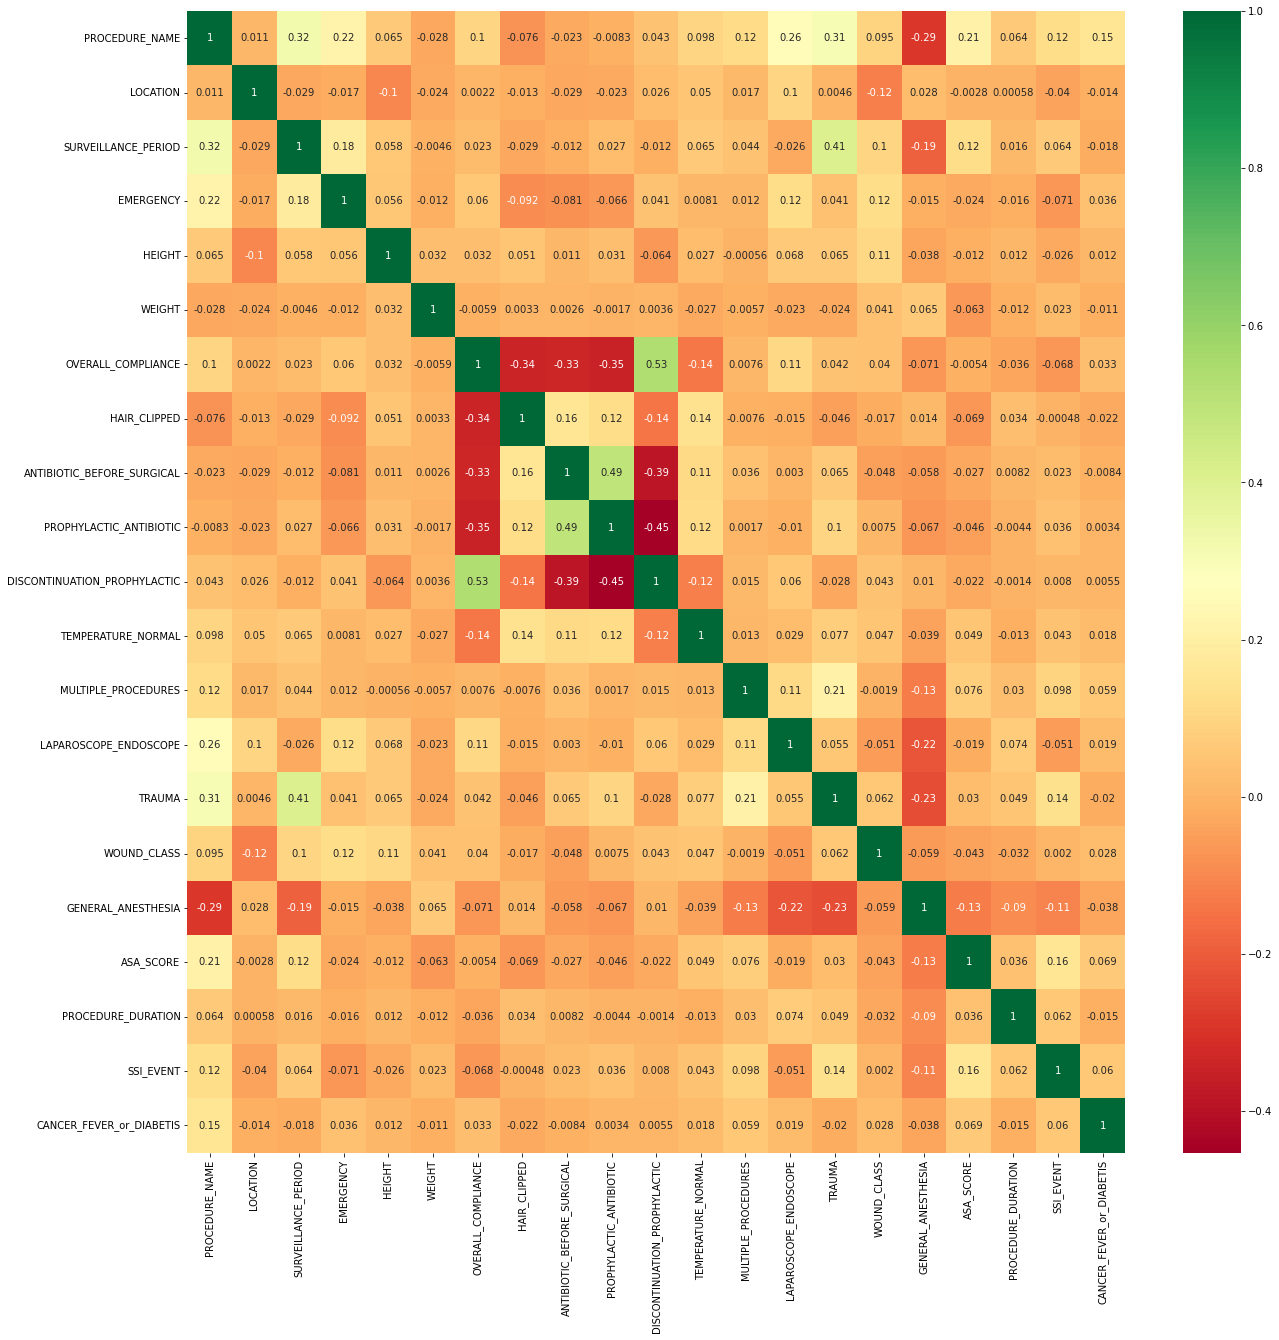

In [44]:
df_corr = data.corr()
t_corr = df_corr.index
plt.figure(figsize=(data.shape[1], data.shape[1]))
graph = sns.heatmap(data[t_corr].corr(), annot=True, cmap='RdYlGn')

In [46]:
x = data.drop(['SSI_EVENT'], axis=1)
y = data['SSI_EVENT']

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=5)

pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
print(sum(pca.explained_variance_ratio_ * 100))
pca.explained_variance_ratio_ * 100

66.83964450910369


array([12.39925606, 11.1259194 ,  6.66212698,  5.81708649,  5.56235748,
        5.44144224,  5.29311628,  5.04741185,  4.86193163,  4.62899611])

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# # define feature selection
# fs = SelectKBest(score_func=f_classif, k=8)
# # apply feature selection
# X_selected = fs.fit_transform(x, y)
# print(X_selected.shape)

In [51]:
# Split dataset into test and train
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(pca_data, y, test_size=0.30, random_state=5)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [53]:
sgd = SGDClassifier(loss="log_loss")
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

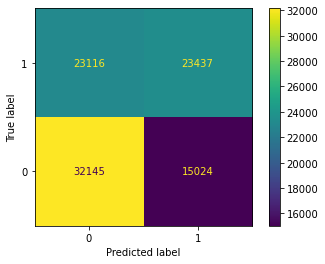

In [54]:
sgd_pred = sgd.predict(X_test)
cfm = confusion_matrix(y_test, sgd_pred)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
plt.show()

In [55]:
X_train.shape

(218683, 10)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.30)

In [ ]:
pred_ann = model.predict(X_test)
preds_ann = (pred_ann > 0.5) * 1
scores = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
cfm = confusion_matrix(y_test, preds_ann)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# # Define models
# models_list = []
# models_list.append(('LR', LogisticRegression(random_state=1)))
# models_list.append(('DTC', DecisionTreeClassifier(random_state=1)))
# # models_list.append(('KNN', KNeighborsClassifier()))
# models_list.append(('GNB', GaussianNB()))
# # models_list.append(('SVM', SVC(kernel='linear', gamma='auto')))
# models_list.append(('RF', RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)))

In [ ]:
# # Modelling and evaluation

# models = []
# outcomes = []

# for name, model in models_list:
#     kfold = ms.KFold(random_state=5, n_splits=10, shuffle=True)
#     cross_val = ms.cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     outcomes.append(cross_val)
#     models.append(name)
#     print(f"{name}: {cross_val.mean()} - {cross_val.std()}")
#     print(f"accuracy: {accuracy_score(y_test, pred)}")
#     combine = pd.DataFrame(dict(actual=y_test, prediction=pred))
#     print(' ')
#     print('confusion matrix')
#     print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
#     print(' ')
#     print('classification report')
#     print(classification_report(y_test, pred))
#     print(' ')
#     print('------------------------------------------------------------------')
#     print(' ')